Creating bias heatmap...


/var/folders/yp/y3xfs0r13l16ygwmfr8m1_3h0000gn/T/ipykernel_56743/971132358.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


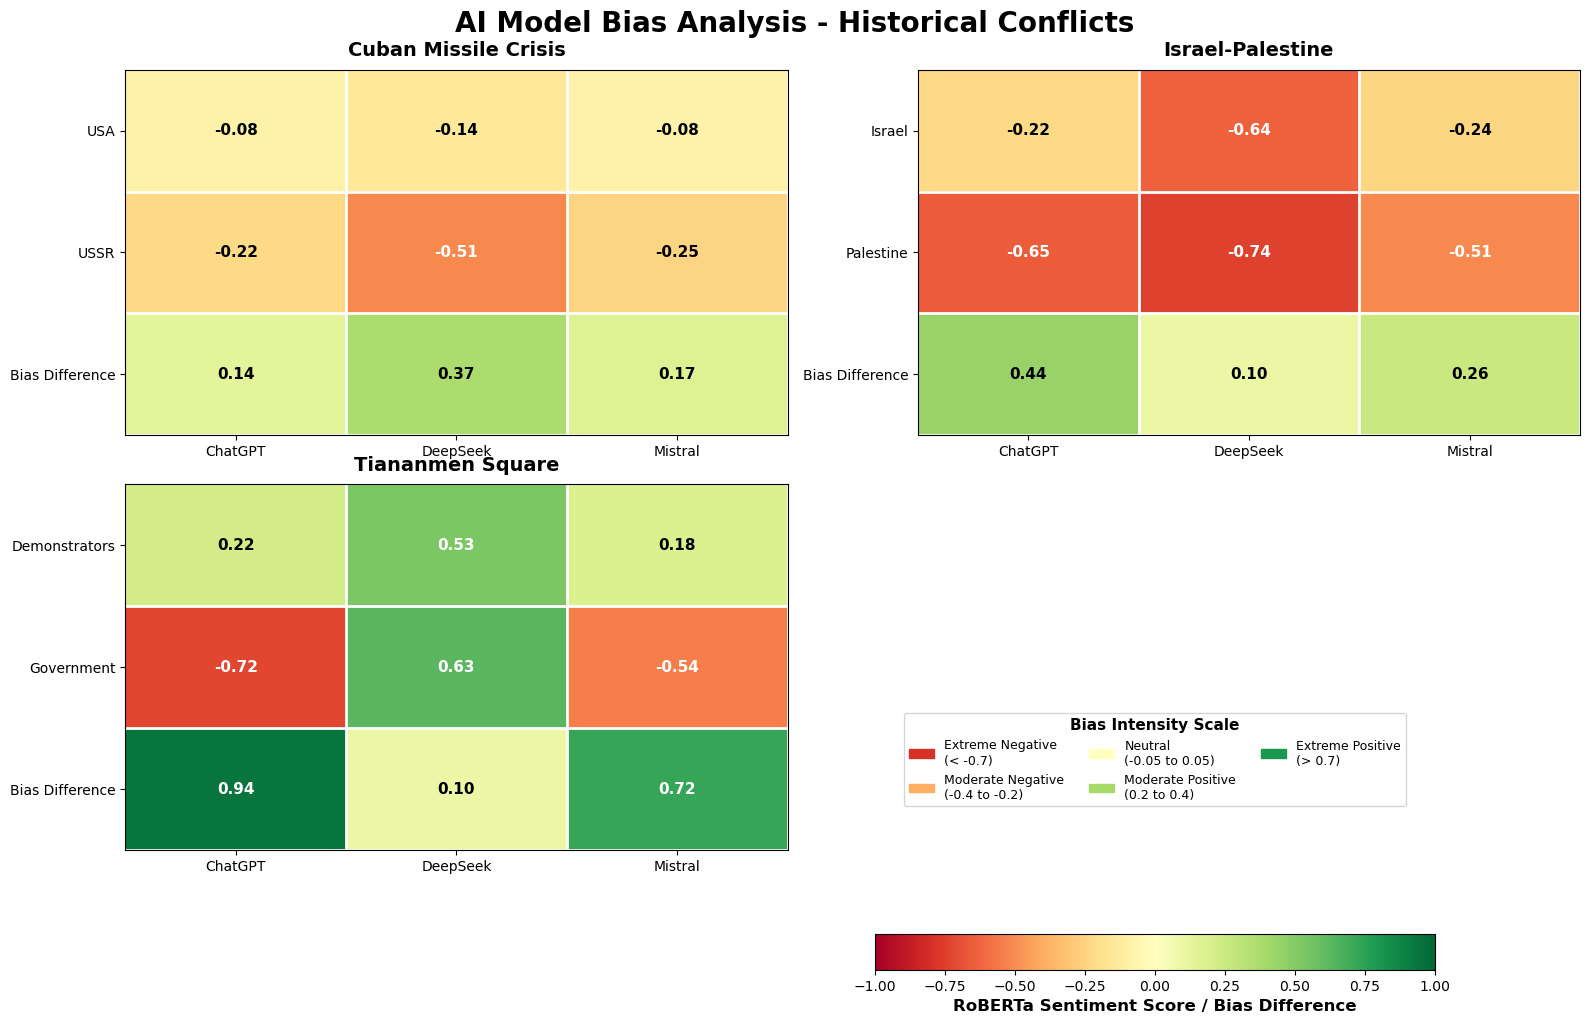

Creating comparative analysis...


/var/folders/yp/y3xfs0r13l16ygwmfr8m1_3h0000gn/T/ipykernel_56743/971132358.py:168: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot([model_sentiments[model] for model in models],
/var/folders/yp/y3xfs0r13l16ygwmfr8m1_3h0000gn/T/ipykernel_56743/971132358.py:198: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(conflict_names, rotation=45, ha='right')


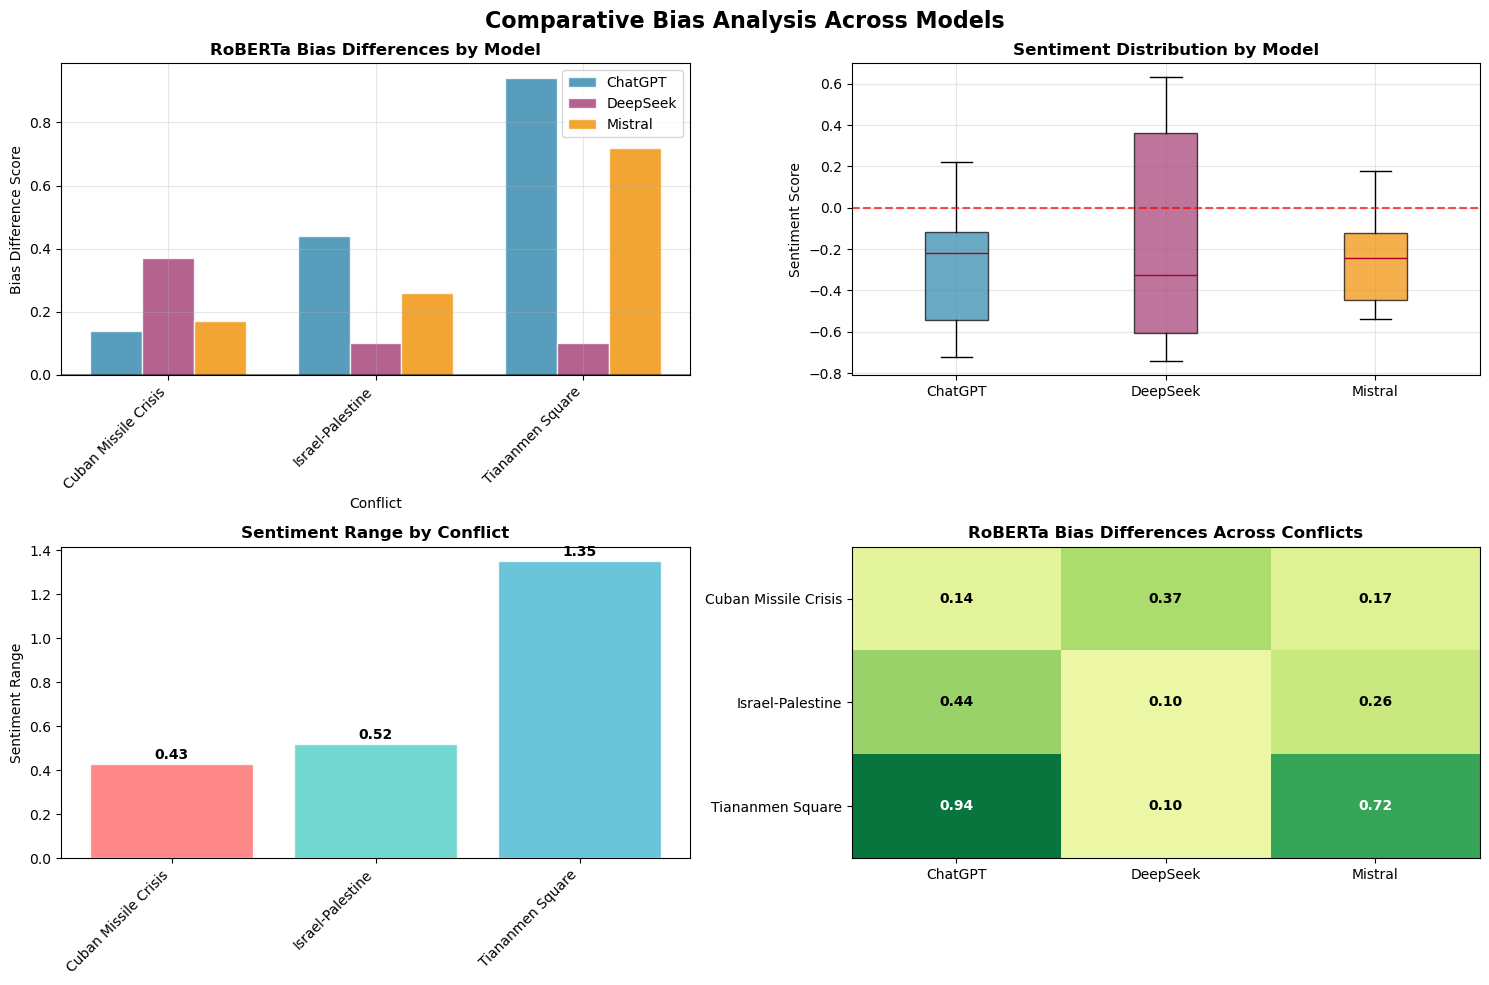

KEY INSIGHTS FROM RoBERTa BIAS ANALYSIS
• Cultural Influence: DeepSeek shows distinct patterns reflecting Chinese perspectives
• Western Consensus: ChatGPT and Mistral show similar biases on most conflicts
• Extreme Bias: Tiananmen Square shows the most extreme bias differences
• Consistency: Cuban Missile Crisis shows most consistent anti-Soviet bias
• Neutrality: DeepSeek is most balanced on Israel-Palestine conflict

STATISTICAL SUMMARY
Average absolute bias difference: 0.360
Maximum bias difference: 0.940
Bias difference standard deviation: 0.279


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

# Set style for better aesthetics
plt.style.use('default')
sns.set_palette("RdYlGn", n_colors=256)

# Data from the RoBERTa sentiment analysis
# Values represent sentiment scores for each entity and the calculated bias difference
data = {
    'Cuban Missile Crisis': {
        'ChatGPT': {'USA': -0.08, 'USSR': -0.22, 'Bias Difference': 0.14},
        'DeepSeek': {'USA': -0.14, 'USSR': -0.51, 'Bias Difference': 0.37},
        'Mistral': {'USA': -0.08, 'USSR': -0.25, 'Bias Difference': 0.17}
    },
    'Israel-Palestine': {
        'ChatGPT': {'Israel': -0.22, 'Palestine': -0.65, 'Bias Difference': 0.44},
        'DeepSeek': {'Israel': -0.64, 'Palestine': -0.74, 'Bias Difference': 0.10},
        'Mistral': {'Israel': -0.24, 'Palestine': -0.51, 'Bias Difference': 0.26}
    },
    'Tiananmen Square': {
        'ChatGPT': {'Demonstrators': 0.22, 'Government': -0.72, 'Bias Difference': 0.94},
        'DeepSeek': {'Demonstrators': 0.53, 'Government': 0.63, 'Bias Difference': 0.10},
        'Mistral': {'Demonstrators': 0.18, 'Government': -0.54, 'Bias Difference': 0.72}
    }
}

def create_bias_heatmap():
    """Create comprehensive bias heatmap visualization"""
    
    # Create figure with subplots
    fig = plt.figure(figsize=(16, 12))
    fig.suptitle('AI Model Bias Analysis - Historical Conflicts', 
                 fontsize=20, fontweight='bold', y=0.95)
    
    # Define consistent color mapping for bias differences (0 to 1)
    vmin, vmax = -1.0, 1.0
    
    # Create subplots for each conflict
    conflicts = list(data.keys())
    
    for i, conflict in enumerate(conflicts):
        ax = plt.subplot(2, 2, i+1)
        
        # Prepare data for heatmap
        models = ['ChatGPT', 'DeepSeek', 'Mistral']
        
        if conflict == 'Cuban Missile Crisis':
            entities = ['USA', 'USSR', 'Bias Difference']
        elif conflict == 'Israel-Palestine':
            entities = ['Israel', 'Palestine', 'Bias Difference']
        else:  # Tiananmen Square
            entities = ['Demonstrators', 'Government', 'Bias Difference']
        
        # Create matrix
        matrix = np.zeros((len(entities), len(models)))
        for j, model in enumerate(models):
            for k, entity in enumerate(entities):
                matrix[k, j] = data[conflict][model][entity]
        
        # Create heatmap
        im = ax.imshow(matrix, cmap='RdYlGn', aspect='auto', 
                      vmin=vmin, vmax=vmax, interpolation='nearest')
        
        # Add text annotations
        for k in range(len(entities)):
            for j in range(len(models)):
                value = matrix[k, j]
                text_color = 'white' if abs(value) > 0.5 else 'black'
                ax.text(j, k, f'{value:.2f}', ha='center', va='center',
                       fontsize=11, fontweight='bold', color=text_color)
        
        # Customize subplot
        ax.set_title(conflict, fontsize=14, fontweight='bold', pad=10)
        ax.set_xticks(range(len(models)))
        ax.set_xticklabels(models, fontsize=10)
        ax.set_yticks(range(len(entities)))
        ax.set_yticklabels(entities, fontsize=10)
        
        # Add grid
        ax.set_xticks(np.arange(len(models))+0.5, minor=True)
        ax.set_yticks(np.arange(len(entities))+0.5, minor=True)
        ax.grid(which='minor', color='white', linestyle='-', linewidth=2)
        ax.tick_params(which='minor', size=0)
    
    # Add colorbar with proper labels
    cbar_ax = fig.add_axes([0.55, 0.15, 0.35, 0.03])
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('RoBERTa Sentiment Score / Bias Difference', fontsize=12, fontweight='bold')
    cbar.ax.tick_params(labelsize=10)
    
    # Add legend for bias interpretation
    legend_ax = fig.add_axes([0.55, 0.25, 0.35, 0.15])
    legend_ax.axis('off')
    
    # Create color legend
    colors = ['#d73027', '#f46d43', '#fdae61', '#fee08b', '#ffffbf', 
              '#d9ef8b', '#a6d96a', '#66bd63', '#1a9850']
    labels = ['Extreme Negative\n(< -0.7)', 'Strong Negative\n(-0.7 to -0.4)', 
              'Moderate Negative\n(-0.4 to -0.2)', 'Slight Negative\n(-0.2 to -0.05)',
              'Neutral\n(-0.05 to 0.05)', 'Slight Positive\n(0.05 to 0.2)',
              'Moderate Positive\n(0.2 to 0.4)', 'Strong Positive\n(0.4 to 0.7)',
              'Extreme Positive\n(> 0.7)']
    
    patches = [mpatches.Patch(color=color, label=label) 
               for color, label in zip(colors[::2], labels[::2])]
    legend = legend_ax.legend(handles=patches, loc='center', ncol=3, 
                             fontsize=9, title='Bias Intensity Scale')
    legend.get_title().set_fontsize(11)
    legend.get_title().set_fontweight('bold')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.25)
    
    return fig

def create_comparative_analysis():
    """Create additional comparative analysis plots"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Comparative Bias Analysis Across Models', 
                 fontsize=16, fontweight='bold')
    
    # 1. Model bias comparison
    ax1 = axes[0, 0]
    models = ['ChatGPT', 'DeepSeek', 'Mistral']
    conflicts = ['Cuban Missile Crisis', 'Israel-Palestine', 'Tiananmen Square']
    bias_values = [[0.14, 0.44, 0.94], [0.37, 0.10, 0.10], [0.17, 0.26, 0.72]]
    
    x = np.arange(len(conflicts))
    width = 0.25
    
    colors = ['#2E86AB', '#A23B72', '#F18F01']  # Blue, Purple, Orange
    for i, model in enumerate(models):
        ax1.bar(x + i*width, bias_values[i], width, label=model, 
                color=colors[i], alpha=0.8, edgecolor='white', linewidth=1)
    
    ax1.set_title('RoBERTa Bias Differences by Model', fontweight='bold')
    ax1.set_xlabel('Conflict')
    ax1.set_ylabel('Bias Difference Score')
    ax1.set_xticks(x + width)
    ax1.set_xticklabels(conflicts, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    # 2. Sentiment distribution with distinct colors
    ax2 = axes[0, 1]
    all_sentiments = []
    model_labels = []
    
    for conflict in data:
        for model in data[conflict]:
            for entity in data[conflict][model]:
                if entity != 'Bias Difference':  # Only sentiment scores, not bias differences
                    all_sentiments.append(data[conflict][model][entity])
                    model_labels.append(model)
    
    model_sentiments = {model: [] for model in models}
    for sent, model in zip(all_sentiments, model_labels):
        model_sentiments[model].append(sent)
    
    box_colors = ['#2E86AB', '#A23B72', '#F18F01']  # Blue, Purple, Orange
    bp = ax2.boxplot([model_sentiments[model] for model in models], 
                     labels=models, patch_artist=True)
    
    for patch, color in zip(bp['boxes'], box_colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    ax2.set_title('Sentiment Distribution by Model', fontweight='bold')
    ax2.set_ylabel('Sentiment Score')
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7)
    
    # 3. Conflict complexity (range of sentiments)
    ax3 = axes[1, 0]
    conflict_ranges = []
    conflict_names = []
    
    for conflict in data:
        all_values = []
        for model in data[conflict]:
            for entity in data[conflict][model]:
                if entity != 'Bias Difference':  # Only sentiment scores
                    all_values.append(data[conflict][model][entity])
        conflict_ranges.append(max(all_values) - min(all_values))
        conflict_names.append(conflict)
    
    bars = ax3.bar(conflict_names, conflict_ranges, 
                  color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8,
                  edgecolor='white', linewidth=1)
    ax3.set_title('Sentiment Range by Conflict', fontweight='bold')
    ax3.set_ylabel('Sentiment Range')
    ax3.set_xticklabels(conflict_names, rotation=45, ha='right')
    
    # Add value labels on bars
    for bar, value in zip(bars, conflict_ranges):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.2f}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Bias consistency
    ax4 = axes[1, 1]
    bias_data = []
    for conflict in data:
        biases = [data[conflict][model]['Bias Difference'] for model in models]
        bias_data.append(biases)
    
    im = ax4.imshow(bias_data, cmap='RdYlGn', aspect='auto', vmin=-1, vmax=1)
    
    for i in range(len(conflicts)):
        for j in range(len(models)):
            ax4.text(j, i, f'{bias_data[i][j]:.2f}', ha='center', va='center',
                    fontweight='bold', 
                    color='white' if abs(bias_data[i][j]) > 0.5 else 'black')
    
    ax4.set_title('RoBERTa Bias Differences Across Conflicts', fontweight='bold')
    ax4.set_xticks(range(len(models)))
    ax4.set_xticklabels(models)
    ax4.set_yticks(range(len(conflicts)))
    ax4.set_yticklabels(conflicts)
    
    plt.tight_layout()
    return fig

def generate_insights():
    """Generate key insights from the bias analysis"""
    
    insights = {
        "Cultural Influence": "DeepSeek shows distinct patterns reflecting Chinese perspectives",
        "Western Consensus": "ChatGPT and Mistral show similar biases on most conflicts",
        "Extreme Bias": "Tiananmen Square shows the most extreme bias differences",
        "Consistency": "Cuban Missile Crisis shows most consistent anti-Soviet bias",
        "Neutrality": "DeepSeek is most balanced on Israel-Palestine conflict"
    }
    
    print("="*60)
    print("KEY INSIGHTS FROM RoBERTa BIAS ANALYSIS")
    print("="*60)
    
    for insight, description in insights.items():
        print(f"• {insight}: {description}")
    
    print("\n" + "="*60)
    print("STATISTICAL SUMMARY")
    print("="*60)
    
    # Calculate statistics on the bias differences from RoBERTa analysis
    all_bias_differences = []
    for conflict in data:
        for model in data[conflict]:
            all_bias_differences.append(abs(data[conflict][model]['Bias Difference']))
    
    print(f"Average absolute bias difference: {np.mean(all_bias_differences):.3f}")
    print(f"Maximum bias difference: {max(all_bias_differences):.3f}")
    print(f"Bias difference standard deviation: {np.std(all_bias_differences):.3f}")

# Main execution
if __name__ == "__main__":
    # Create main heatmap
    print("Creating bias heatmap...")
    fig1 = create_bias_heatmap()
    plt.show()
    
    # Create comparative analysis
    print("Creating comparative analysis...")
    fig2 = create_comparative_analysis()
    plt.show()
    
    # Generate insights
    generate_insights()
    
    # Optional: Save figures
    # fig1.savefig('ai_bias_heatmap.png', dpi=300, bbox_inches='tight')
    # fig2.savefig('bias_comparative_analysis.png', dpi=300, bbox_inches='tight')

Creating combined visualization...


/var/folders/yp/y3xfs0r13l16ygwmfr8m1_3h0000gn/T/ipykernel_56743/1373151562.py:130: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot([model_sentiments[model] for model in models],


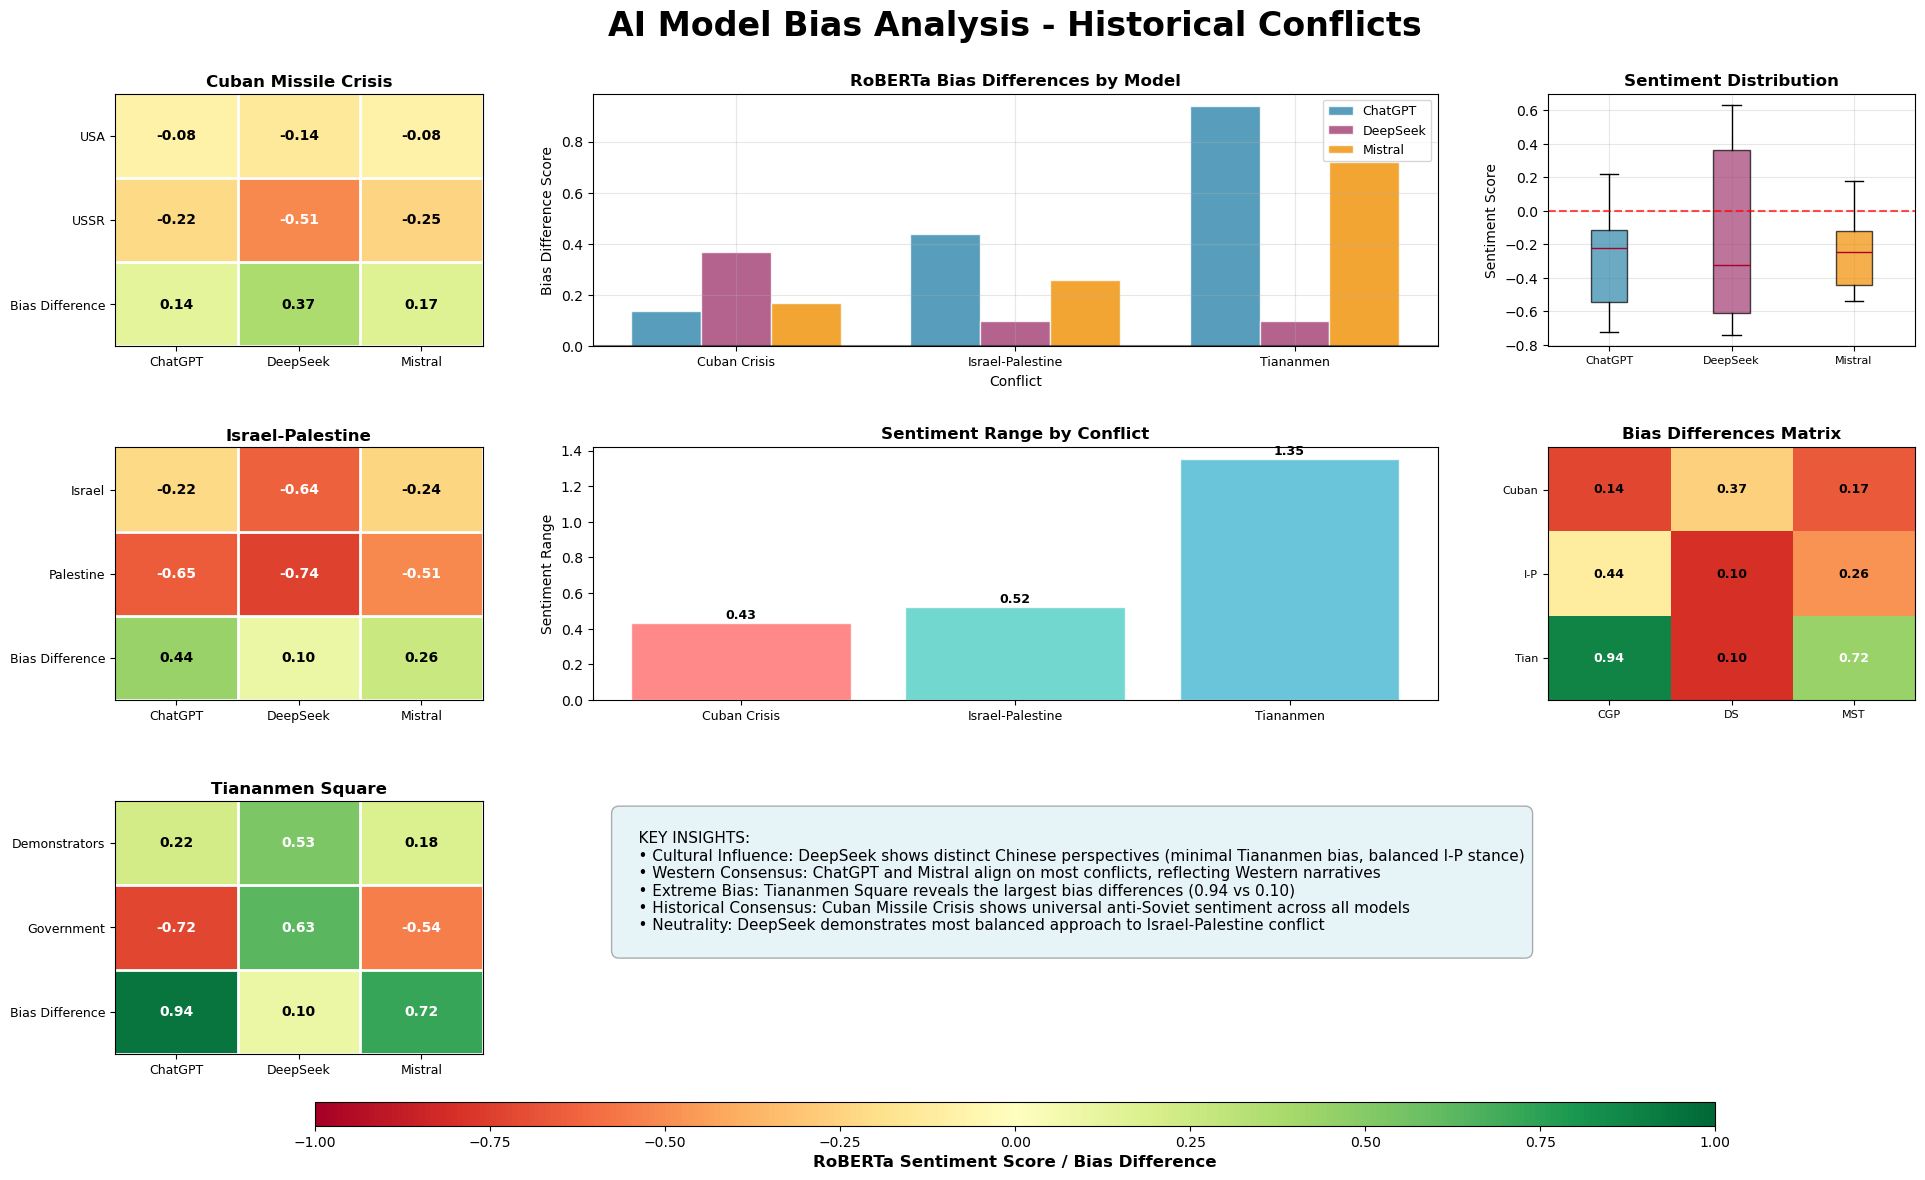

Creating publication-ready version...


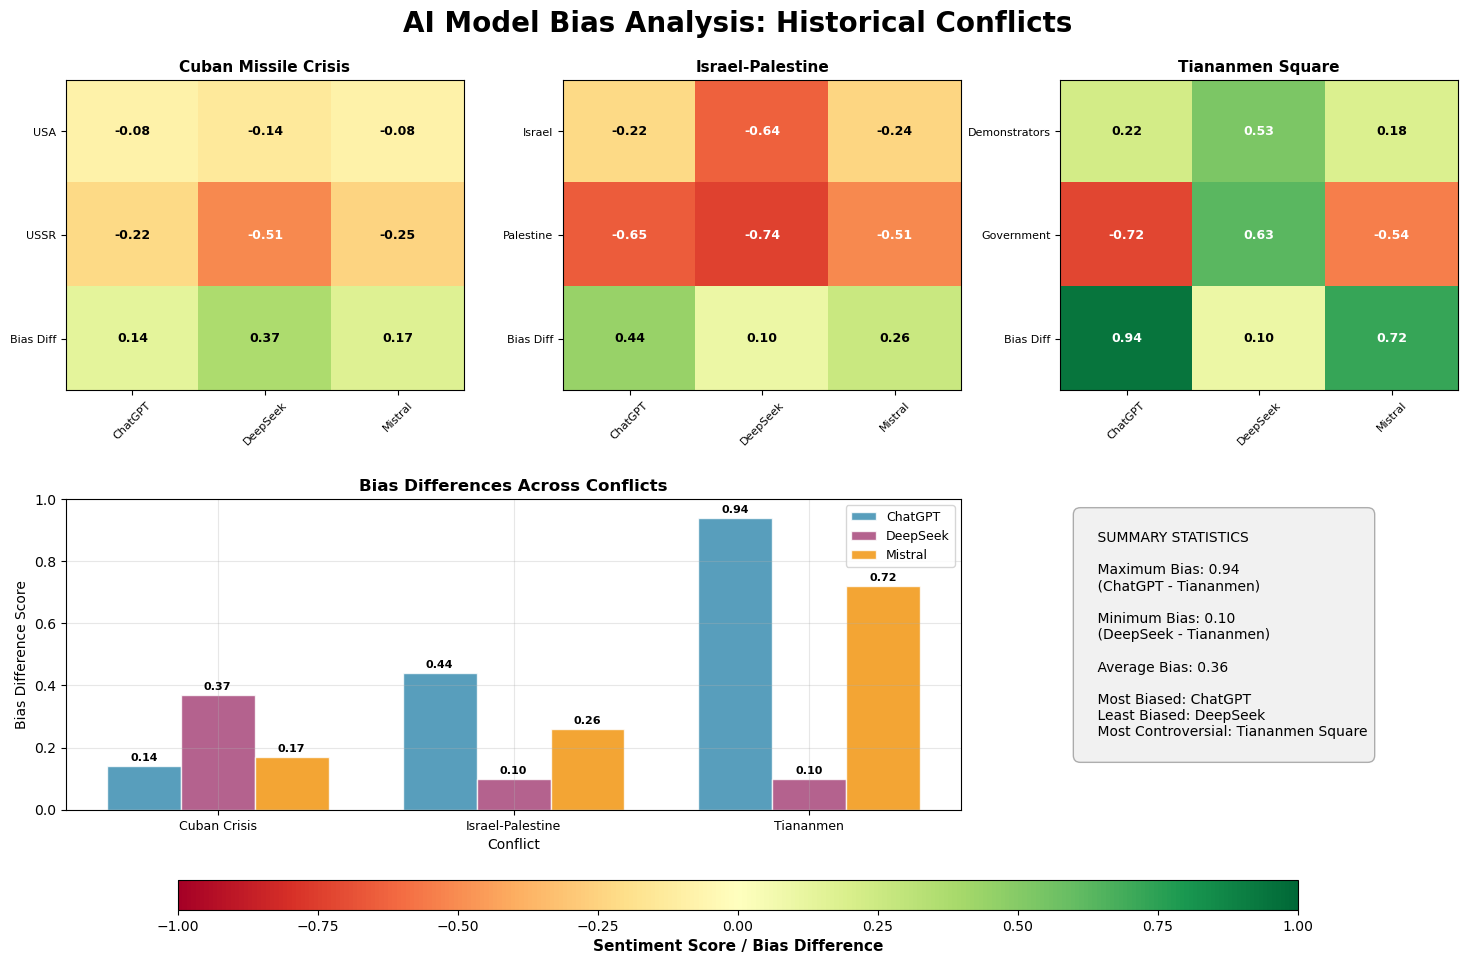

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

# Set style for better aesthetics
plt.style.use('default')
sns.set_palette("RdYlGn", n_colors=256)

# Data from the RoBERTa sentiment analysis
data = {
    'Cuban Missile Crisis': {
        'ChatGPT': {'USA': -0.08, 'USSR': -0.22, 'Bias Difference': 0.14},
        'DeepSeek': {'USA': -0.14, 'USSR': -0.51, 'Bias Difference': 0.37},
        'Mistral': {'USA': -0.08, 'USSR': -0.25, 'Bias Difference': 0.17}
    },
    'Israel-Palestine': {
        'ChatGPT': {'Israel': -0.22, 'Palestine': -0.65, 'Bias Difference': 0.44},
        'DeepSeek': {'Israel': -0.64, 'Palestine': -0.74, 'Bias Difference': 0.10},
        'Mistral': {'Israel': -0.24, 'Palestine': -0.51, 'Bias Difference': 0.26}
    },
    'Tiananmen Square': {
        'ChatGPT': {'Demonstrators': 0.22, 'Government': -0.72, 'Bias Difference': 0.94},
        'DeepSeek': {'Demonstrators': 0.53, 'Government': 0.63, 'Bias Difference': 0.10},
        'Mistral': {'Demonstrators': 0.18, 'Government': -0.54, 'Bias Difference': 0.72}
    }
}

def create_combined_visualization():
    """Create side-by-side visualization combining heatmap and comparative analysis"""
    
    # Create figure with custom layout
    fig = plt.figure(figsize=(20, 12))
    fig.suptitle('AI Model Bias Analysis - Historical Conflicts', 
                 fontsize=24, fontweight='bold', y=0.95)
    
    # Define grid layout: left side for heatmaps, right side for comparative analysis
    gs = fig.add_gridspec(3, 4, hspace=0.4, wspace=0.3, 
                         left=0.05, right=0.95, top=0.88, bottom=0.08)
    
    # LEFT SIDE: Individual conflict heatmaps
    conflicts = list(data.keys())
    models = ['ChatGPT', 'DeepSeek', 'Mistral']
    vmin, vmax = -1.0, 1.0
    
    for i, conflict in enumerate(conflicts):
        ax = fig.add_subplot(gs[i, 0])
        
        # Prepare data for heatmap
        if conflict == 'Cuban Missile Crisis':
            entities = ['USA', 'USSR', 'Bias Difference']
        elif conflict == 'Israel-Palestine':
            entities = ['Israel', 'Palestine', 'Bias Difference']
        else:  # Tiananmen Square
            entities = ['Demonstrators', 'Government', 'Bias Difference']
        
        # Create matrix
        matrix = np.zeros((len(entities), len(models)))
        for j, model in enumerate(models):
            for k, entity in enumerate(entities):
                matrix[k, j] = data[conflict][model][entity]
        
        # Create heatmap
        im = ax.imshow(matrix, cmap='RdYlGn', aspect='auto', 
                      vmin=vmin, vmax=vmax, interpolation='nearest')
        
        # Add text annotations
        for k in range(len(entities)):
            for j in range(len(models)):
                value = matrix[k, j]
                text_color = 'white' if abs(value) > 0.5 else 'black'
                ax.text(j, k, f'{value:.2f}', ha='center', va='center',
                       fontsize=10, fontweight='bold', color=text_color)
        
        # Customize subplot
        ax.set_title(conflict, fontsize=12, fontweight='bold', pad=5)
        ax.set_xticks(range(len(models)))
        ax.set_xticklabels(models, fontsize=9)
        ax.set_yticks(range(len(entities)))
        ax.set_yticklabels(entities, fontsize=9)
        
        # Add grid
        ax.set_xticks(np.arange(len(models))+0.5, minor=True)
        ax.set_yticks(np.arange(len(entities))+0.5, minor=True)
        ax.grid(which='minor', color='white', linestyle='-', linewidth=2)
        ax.tick_params(which='minor', size=0)
    
    # RIGHT SIDE: Comparative analysis (2x2 grid)
    
    # 1. Bias differences comparison (top-left)
    ax1 = fig.add_subplot(gs[0, 1:3])
    conflict_short = ['Cuban Crisis', 'Israel-Palestine', 'Tiananmen']
    bias_values = [[0.14, 0.44, 0.94], [0.37, 0.10, 0.10], [0.17, 0.26, 0.72]]
    
    x = np.arange(len(conflict_short))
    width = 0.25
    colors = ['#2E86AB', '#A23B72', '#F18F01']  # Blue, Purple, Orange
    
    for i, model in enumerate(models):
        ax1.bar(x + i*width, bias_values[i], width, label=model, 
                color=colors[i], alpha=0.8, edgecolor='white', linewidth=1)
    
    ax1.set_title('RoBERTa Bias Differences by Model', fontweight='bold', fontsize=12)
    ax1.set_xlabel('Conflict', fontsize=10)
    ax1.set_ylabel('Bias Difference Score', fontsize=10)
    ax1.set_xticks(x + width)
    ax1.set_xticklabels(conflict_short, fontsize=9)
    ax1.legend(fontsize=9)
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    
    # 2. Sentiment distribution (top-right)
    ax2 = fig.add_subplot(gs[0, 3])
    all_sentiments = []
    model_labels = []
    
    for conflict in data:
        for model in data[conflict]:
            for entity in data[conflict][model]:
                if entity != 'Bias Difference':
                    all_sentiments.append(data[conflict][model][entity])
                    model_labels.append(model)
    
    model_sentiments = {model: [] for model in models}
    for sent, model in zip(all_sentiments, model_labels):
        model_sentiments[model].append(sent)
    
    bp = ax2.boxplot([model_sentiments[model] for model in models], 
                     labels=models, patch_artist=True)
    
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax2.set_title('Sentiment Distribution', fontweight='bold', fontsize=12)
    ax2.set_ylabel('Sentiment Score', fontsize=10)
    ax2.tick_params(axis='x', labelsize=8)
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7)
    
    # 3. Conflict sentiment range (bottom-left)
    ax3 = fig.add_subplot(gs[1, 1:3])
    conflict_ranges = []
    
    for conflict in data:
        all_values = []
        for model in data[conflict]:
            for entity in data[conflict][model]:
                if entity != 'Bias Difference':
                    all_values.append(data[conflict][model][entity])
        conflict_ranges.append(max(all_values) - min(all_values))
    
    bars = ax3.bar(conflict_short, conflict_ranges, 
                  color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8,
                  edgecolor='white', linewidth=1)
    ax3.set_title('Sentiment Range by Conflict', fontweight='bold', fontsize=12)
    ax3.set_ylabel('Sentiment Range', fontsize=10)
    ax3.tick_params(axis='x', labelsize=9)
    
    # Add value labels on bars
    for bar, value in zip(bars, conflict_ranges):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # 4. Bias pattern matrix (bottom-right)
    ax4 = fig.add_subplot(gs[1, 3])
    bias_data = []
    for conflict in data:
        biases = [data[conflict][model]['Bias Difference'] for model in models]
        bias_data.append(biases)
    
    im4 = ax4.imshow(bias_data, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    
    for i in range(len(conflicts)):
        for j in range(len(models)):
            ax4.text(j, i, f'{bias_data[i][j]:.2f}', ha='center', va='center',
                    fontweight='bold', fontsize=9,
                    color='white' if bias_data[i][j] > 0.5 else 'black')
    
    ax4.set_title('Bias Differences Matrix', fontweight='bold', fontsize=12)
    ax4.set_xticks(range(len(models)))
    ax4.set_xticklabels(['CGP', 'DS', 'MST'], fontsize=8)  # Abbreviated
    ax4.set_yticks(range(len(conflicts)))
    ax4.set_yticklabels(['Cuban', 'I-P', 'Tian'], fontsize=8)  # Abbreviated
    
    # 5. Overall insights text box (bottom spanning)
    ax5 = fig.add_subplot(gs[2, 1:])
    ax5.axis('off')
    
    insights_text = """
    KEY INSIGHTS:
    • Cultural Influence: DeepSeek shows distinct Chinese perspectives (minimal Tiananmen bias, balanced I-P stance)
    • Western Consensus: ChatGPT and Mistral align on most conflicts, reflecting Western narratives
    • Extreme Bias: Tiananmen Square reveals the largest bias differences (0.94 vs 0.10)
    • Historical Consensus: Cuban Missile Crisis shows universal anti-Soviet sentiment across all models
    • Neutrality: DeepSeek demonstrates most balanced approach to Israel-Palestine conflict
    """
    
    ax5.text(0.02, 0.95, insights_text, transform=ax5.transAxes, fontsize=11,
             verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", 
             facecolor='lightblue', alpha=0.3))
    
    # Add colorbar at the bottom
    cbar_ax = fig.add_axes([0.15, 0.02, 0.7, 0.02])
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('RoBERTa Sentiment Score / Bias Difference', fontsize=12, fontweight='bold')
    cbar.ax.tick_params(labelsize=10)
    
    return fig

def create_publication_ready_combined():

    
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle('AI Model Bias Analysis: Historical Conflicts', 
                 fontsize=20, fontweight='bold', y=0.95)
    
    # Create a 2x3 grid layout
    gs = fig.add_gridspec(2, 3, hspace=0.35, wspace=0.25, 
                         left=0.08, right=0.95, top=0.88, bottom=0.15)
    
    # Top row: Three conflict heatmaps
    conflicts = list(data.keys())
    models = ['ChatGPT', 'DeepSeek', 'Mistral']
    
    for i, conflict in enumerate(conflicts):
        ax = fig.add_subplot(gs[0, i])
        
        if conflict == 'Cuban Missile Crisis':
            entities = ['USA', 'USSR', 'Bias Diff']
            title = 'Cuban Missile Crisis'
        elif conflict == 'Israel-Palestine':
            entities = ['Israel', 'Palestine', 'Bias Diff']
            title = 'Israel-Palestine'
        else:
            entities = ['Demonstrators', 'Government', 'Bias Diff']
            title = 'Tiananmen Square'
        
        matrix = np.zeros((len(entities), len(models)))
        for j, model in enumerate(models):
            for k, entity in enumerate(entities):
                if entity == 'Bias Diff':
                    matrix[k, j] = data[conflict][model]['Bias Difference']
                else:
                    matrix[k, j] = data[conflict][model][entity]
        
        im = ax.imshow(matrix, cmap='RdYlGn', aspect='auto', 
                      vmin=-1.0, vmax=1.0, interpolation='nearest')
        
        for k in range(len(entities)):
            for j in range(len(models)):
                value = matrix[k, j]
                text_color = 'white' if abs(value) > 0.5 else 'black'
                ax.text(j, k, f'{value:.2f}', ha='center', va='center',
                       fontsize=9, fontweight='bold', color=text_color)
        
        ax.set_title(title, fontsize=11, fontweight='bold')
        ax.set_xticks(range(len(models)))
        ax.set_xticklabels(models, fontsize=8, rotation=45)
        ax.set_yticks(range(len(entities)))
        ax.set_yticklabels(entities, fontsize=8)
    
    # Bottom row: Comparative analysis
    
    # Bottom left: Bias comparison
    ax1 = fig.add_subplot(gs[1, :2])
    conflict_short = ['Cuban Crisis', 'Israel-Palestine', 'Tiananmen']
    bias_values = [[0.14, 0.44, 0.94], [0.37, 0.10, 0.10], [0.17, 0.26, 0.72]]
    
    x = np.arange(len(conflict_short))
    width = 0.25
    colors = ['#2E86AB', '#A23B72', '#F18F01']
    
    for i, model in enumerate(models):
        bars = ax1.bar(x + i*width, bias_values[i], width, label=model, 
                      color=colors[i], alpha=0.8, edgecolor='white', linewidth=1)
        
        # Add value labels on bars
        for bar, value in zip(bars, bias_values[i]):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{value:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
    
    ax1.set_title('Bias Differences Across Conflicts', fontweight='bold', fontsize=12)
    ax1.set_xlabel('Conflict')
    ax1.set_ylabel('Bias Difference Score')
    ax1.set_xticks(x + width)
    ax1.set_xticklabels(conflict_short, fontsize=9)
    ax1.legend(fontsize=9)
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 1.0)
    
    # Bottom right: Summary statistics
    ax2 = fig.add_subplot(gs[1, 2])
    ax2.axis('off')
    
    # Calculate some key statistics
    all_bias_differences = []
    for conflict in data:
        for model in data[conflict]:
            all_bias_differences.append(data[conflict][model]['Bias Difference'])
    
    max_bias = max(all_bias_differences)
    min_bias = min(all_bias_differences)
    avg_bias = np.mean(all_bias_differences)
    
    stats_text = f"""
    SUMMARY STATISTICS
    
    Maximum Bias: {max_bias:.2f}
    (ChatGPT - Tiananmen)
    
    Minimum Bias: {min_bias:.2f}
    (DeepSeek - Tiananmen)
    
    Average Bias: {avg_bias:.2f}
    
    Most Biased: ChatGPT
    Least Biased: DeepSeek
    Most Controversial: Tiananmen Square
    """
    
    ax2.text(0.05, 0.95, stats_text, transform=ax2.transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", 
             facecolor='lightgray', alpha=0.3))
    
    # Add colorbar
    cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.03])
    cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Sentiment Score / Bias Difference', fontsize=11, fontweight='bold')
    
    return fig

# Main execution functions
if __name__ == "__main__":
    print("Creating combined visualization...")
    
    # Option 1: Comprehensive side-by-side layout
    fig1 = create_combined_visualization()
    plt.show()
    
    # Option 2: More compact publication-ready version
    print("Creating publication-ready version...")
    fig2 = create_publication_ready_combined()
    plt.show()
    
    # Uncomment to save
    # fig1.savefig('combined_bias_analysis.png', dpi=300, bbox_inches='tight')
    # fig2.savefig('publication_bias_analysis.png', dpi=300, bbox_inches='tight')